## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
train_dir = r'C:\Users\Dennis\Desktop\DL0320EN\train'
validation_dir = r'C:\Users\Dennis\Desktop\DL0320EN\valid'
test_dir =r'C:\Users\Dennis\Desktop\DL0320EN\test'

In [3]:
cl = ['5', '10', '20', '50', '100', '200', '500']

In [4]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )




Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [5]:
conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(224, 224, 3))

In [6]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(7,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 7)                 702471    
Total params: 24,290,183
Trainable params: 702,471
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint("resnet50.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [12]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [13]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=5,epochs=20,verbose=1,
                             validation_data=validation_generator,validation_steps=5,callbacks=[checkpoint,early])

Epoch 1/20
4/5 [=======================>......] - ETA: 6s - loss: 8.7496 - accuracy: 0.2500 
Epoch 00001: val_loss improved from inf to 9.62588, saving model to resnet50.h5
5/5 [==============================] - 39s 8s/step - loss: 8.9343 - accuracy: 0.2800 - val_loss: 9.6259 - val_accuracy: 0.1600
Epoch 2/20
4/5 [=======================>......] - ETA: 6s - loss: 6.6236 - accuracy: 0.5500 
Epoch 00002: val_loss improved from 9.62588 to 9.61886, saving model to resnet50.h5
5/5 [==============================] - 38s 8s/step - loss: 7.8778 - accuracy: 0.4800 - val_loss: 9.6189 - val_accuracy: 0.1600
Epoch 3/20
4/5 [=======================>......] - ETA: 6s - loss: 4.8359 - accuracy: 0.7000 
Epoch 00003: val_loss did not improve from 9.61886
5/5 [==============================] - 40s 8s/step - loss: 5.8029 - accuracy: 0.6400 - val_loss: 10.1327 - val_accuracy: 0.1600
Epoch 4/20
4/5 [=======================>......] - ETA: 6s - loss: 5.6413 - accuracy: 0.6500 
Epoch 00004: val_loss did not i

In [15]:
train_history = model.history.history
train_history

{'loss': [8.934302425384521,
  7.87776403427124,
  5.802908039093017,
  5.802514290809631,
  5.802514266967774],
 'accuracy': [0.28, 0.48, 0.64, 0.64, 0.64],
 'val_loss': [9.625878238677979,
  9.618862724304199,
  10.132741355895996,
  10.463993740081786,
  10.671533203125],
 'val_accuracy': [0.16, 0.16, 0.16, 0.16, 0.16]}

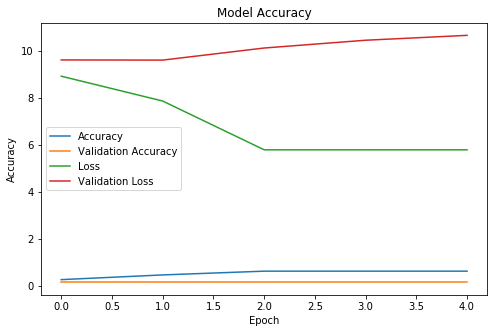

In [16]:
#Plot Graph to see the result
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [17]:
#Save the model
#model.save('resnet50.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0,
        shuffle=False)

Found 70 images belonging to 7 classes.


In [19]:
len(test_generator)

14

In [20]:
resnet = model

In [21]:
resnetscore = resnet.evaluate_generator(test_generator,steps=14,verbose=1)

14/14 [==============================] - 21s 2s/step - loss: 10.6171 - accuracy: 0.1429


In [22]:
resnetscore

[10.61712044151084, 0.14285715]

In [23]:
resnet.metrics_names

['loss', 'accuracy']

In [24]:
print("Accuracy for Resnet50 is %.2f%%" % (resnetscore[1]*100))

Accuracy for Resnet50 is 14.29%


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [25]:
resnet_predict = resnet.predict_generator(generator=test_generator,steps=14,verbose=1)

14/14 [==============================] - 21s 1s/step


In [26]:
resnet_predict

array([[4.06705153e-17, 4.70744882e-04, 4.94276878e-17, 9.29638976e-04,
        9.98573899e-01, 2.57374249e-05, 3.49785898e-15],
       [5.72545717e-18, 6.93608017e-05, 6.53361594e-18, 4.07830259e-04,
        9.99505520e-01, 1.72847413e-05, 5.30562115e-16],
       [2.43264537e-17, 8.60442597e-05, 2.05040041e-17, 4.13613569e-04,
        9.99473155e-01, 2.71411845e-05, 1.58245914e-15],
       [8.62648463e-18, 5.35498257e-05, 7.12682355e-18, 3.85407300e-04,
        9.99534726e-01, 2.63686452e-05, 6.35704156e-16],
       [2.61603016e-17, 2.49477423e-04, 2.56830035e-17, 8.95840698e-04,
        9.98830020e-01, 2.46507789e-05, 2.07259645e-15],
       [9.26382067e-18, 1.31861467e-04, 7.85892389e-18, 6.53030234e-04,
        9.99197304e-01, 1.78090395e-05, 6.27836755e-16],
       [9.95014302e-17, 3.35012010e-04, 8.33896988e-17, 1.26681209e-03,
        9.98360574e-01, 3.75890631e-05, 6.38518550e-15],
       [4.08937680e-17, 1.75372552e-04, 4.45842475e-17, 8.56001163e-04,
        9.98943627e-01, 2

In [28]:
len(resnet_predict)

70

In [29]:
np.argmax(resnet_predict,axis=1)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4], dtype=int64)

In [40]:
resnet_predict[0][4]

0.9985739

In [42]:
resnet_predict[1][4]

0.9995055

In [43]:
value = np.argmax(resnet_predict,axis=1)

In [44]:
value.ndim

1

In [31]:
class_labels = train_generator.class_indices
class_labels

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

In [32]:
train_generator.filenames

['5\\0.jpeg',
 '5\\1.jpeg',
 '5\\2.jpeg',
 '5\\3.jpeg',
 '5\\4.jpeg',
 '5\\5.jpeg',
 '5\\6.jpeg',
 '5\\7.jpeg',
 '5\\8.jpeg',
 '5\\9.jpeg',
 '10\\10.jpeg',
 '10\\11.jpeg',
 '10\\12.jpeg',
 '10\\13.jpeg',
 '10\\14.jpeg',
 '10\\15.jpeg',
 '10\\16.jpeg',
 '10\\17.jpeg',
 '10\\18.jpeg',
 '10\\19.jpeg',
 '20\\20.jpeg',
 '20\\21.jpeg',
 '20\\22.jpeg',
 '20\\23.jpeg',
 '20\\24.jpeg',
 '20\\25.jpeg',
 '20\\26.jpeg',
 '20\\27.jpeg',
 '20\\28.jpeg',
 '20\\29.jpeg',
 '50\\30.jpeg',
 '50\\31.jpeg',
 '50\\32.jpeg',
 '50\\33.jpeg',
 '50\\34.jpeg',
 '50\\35.jpeg',
 '50\\36.jpeg',
 '50\\37.jpeg',
 '50\\38.jpeg',
 '50\\39.jpeg',
 '100\\40.jpeg',
 '100\\41.jpeg',
 '100\\42.jpeg',
 '100\\43.jpeg',
 '100\\44.jpeg',
 '100\\45.jpeg',
 '100\\46.jpeg',
 '100\\47.jpeg',
 '100\\48.jpeg',
 '100\\49.jpeg',
 '200\\50.jpeg',
 '200\\51.jpeg',
 '200\\52.jpeg',
 '200\\53.jpeg',
 '200\\54.jpeg',
 '200\\55.jpeg',
 '200\\56.jpeg',
 '200\\57.jpeg',
 '200\\58.jpeg',
 '200\\59.jpeg',
 '500\\60.jpeg',
 '500\\61.jpeg',
 '500\

In [ ]:
filenames=test_generator.filenames
filenames

In [ ]:
results = pd.DataFrame({"file": filenames,"prediction":vgg_predict[:,0],"class":classes[:,0]})

In [ ]:
results

**Assumption is prediction > 0.5 , class is 1 else prediction < 0.5, class is 0**

### Method 2: Sampling 5 images randomly and predict class

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = image.load_img("19751.jpg",target_size=(224,224,3,1))

# img1 = tf.cast(img1, tf.float32)
img1 = np.asarray(img1)

plt.imshow(img1)
#img1 = np.expand_dims(img1, axis=0)

output1 = vgg16.predict(img1)
print(output1)

if output1[0][1] == 0:
    print("negative")
else:
    print('positive')

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).